In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
# Load the data 
data_path = '/Users/Irfan/Documents/MAIN multilpe colab selector + Quantum inspired SimAgg.xlsx' 
data_path = '/Users/Irfan/Documents/Main All rounds in multilpe colab selector + olympic simagg.xlsx' 
data_excel = pd.ExcelFile(data_path) 
sheet = pd.read_excel(data_excel, sheet_name=0) 
 

In [36]:
# Abbreviations for experiments 
# Define abbreviations for experiment names
abbreviations = {
    "quantum_kg_p2_col_20_output_exp1132_25092727": "KG",
    "quantum_lp_p2_col_20_output_exp1131_25092503": "LP",
    "quantum_GA_p2_col_20_output_exp1133_25132430": "GA",
    "Quantum_tabu_p2_col_20_FeTS2022_exp1344_26865155": "TS",
    "quantum_MA_p2_col_20_output_exp1140_25230276": "MA",
    "quantum_SA_p2_col_20_output_exp1141_25230743": "SA",
    "quantum_fl_p2_col_20_output_exp1148_25285010": "FL",
    "quantum_aco_p2_col_20_output_exp1153_25286188": "ACO",
    "quantum_ica_p2_col_20_output_exp1137_25183312": "ICA",
    "quantum_sds_p2_col_20_output_exp1126_25092383": "SDS",
    "quantum_ql_p2_col_20_output_1123_25067003": "QL",
    "quantum_kwta_p2_col_20_output_exp1110_24767850": "KWTA"
}


In [52]:
# Abbreviations for experiments 

abbreviations = { 
    'olympic_knowledge_graph_p2_col_20_exp1048_23829772': 'KG', 
    'olympic_lp_p2_col_20_FeTS2022_exp1050_23845631': 'LP', 
    'og_simagg_GA_p2_col_20_exp1198_25620035': 'GA', 
    'Olympic_tabu_p2_col_20_FeTS2022_exp1350_26892934': 'TS', 
    'og_simagg_MA_p2_col_20_exp1205_25634364': 'MA', 
    'og_simagg_hmean_SA_p2_col_20_exp1187_25575359': 'SA', 
    'og_simagg_hmean_fl_p2_col_20_exp1184_25575340': 'FL', 
    'og_simagg_hmean_aco_p2_col_20_exp1180_25575332': 'ACO', 
    'og_simagg_hmean_ica_p2_col_20_exp1177_25575319': 'ICA', 
    'og_simagg_hmean_sds_p2_col_20_exp1172_25562638': 'SDS', 
    'og_simaggg_hmean_ql_p2_col_20_output_exp1162_25443463': 'QL', 
    'og_simagg_hmean_kwta_p2_col_20_exp1168_25535424': 'KWTA' 
}
 

In [58]:
abbreviations = {
    "olympic_knowledge_graph_p2_col_20_exp1048_23829772": "KG",
    "olympic_lp_p2_col_20_FeTS2022_exp1050_23845631": "LP",
    "olympic_GA_p2_col_20_FeTS2022_exp1067_24405158": "GA",
    "Olympic_tabu_p2_col_20_FeTS2022_exp1350_26892934": "TS",
    "olympic_MA_p2_col_20_FeTS2022_exp1073_24438857": "MA",
    "olympic_SA_p2_col_20_FeTS2022_exp1076_24452412": "SA",
    "olympic_fl_p2_col_20_output_exp1080_24460739": "FL",
    "olympic_aco_p2_col_20_output_exp1081_24466949": "ACO",
    "olympic_ica_p2_col_20_output_NEW_exp1086_24500931": "ICA",
    "olympic_sds_p2_col_20_output_exp1088_24521231": "SDS",
    "olympic_ql_p2_col_20_output_exp1093_24612037": "QL",
    "olympic_kwta_p2_col_20_output_exp1100_24721639": "KWTA"
}

In [60]:
# Apply abbreviations 
sheet.rename(columns=abbreviations, inplace=True) 
 
# Convert 'Rounds' to integers for plotting 
sheet['Rounds'] = pd.to_numeric(sheet['Rounds'], errors='coerce').dropna().astype(int) 
 
# Melt the data for plotting 
melted = sheet.melt(id_vars=['Rounds', 'Metrics'], var_name='Experiment', value_name='Value') 
melted['Value'] = pd.to_numeric(melted['Value'], errors='coerce') 
 
# Select metrics for plotting 
selected_metrics = ['Simulation Time (minutes)', 'Projected Convergence Score', 'DICE Label 0', 'DICE Label 1', 'DICE Label 2', 'DICE Label 4'] 
filtered_data = melted[melted['Metrics'].isin(selected_metrics)] 
 

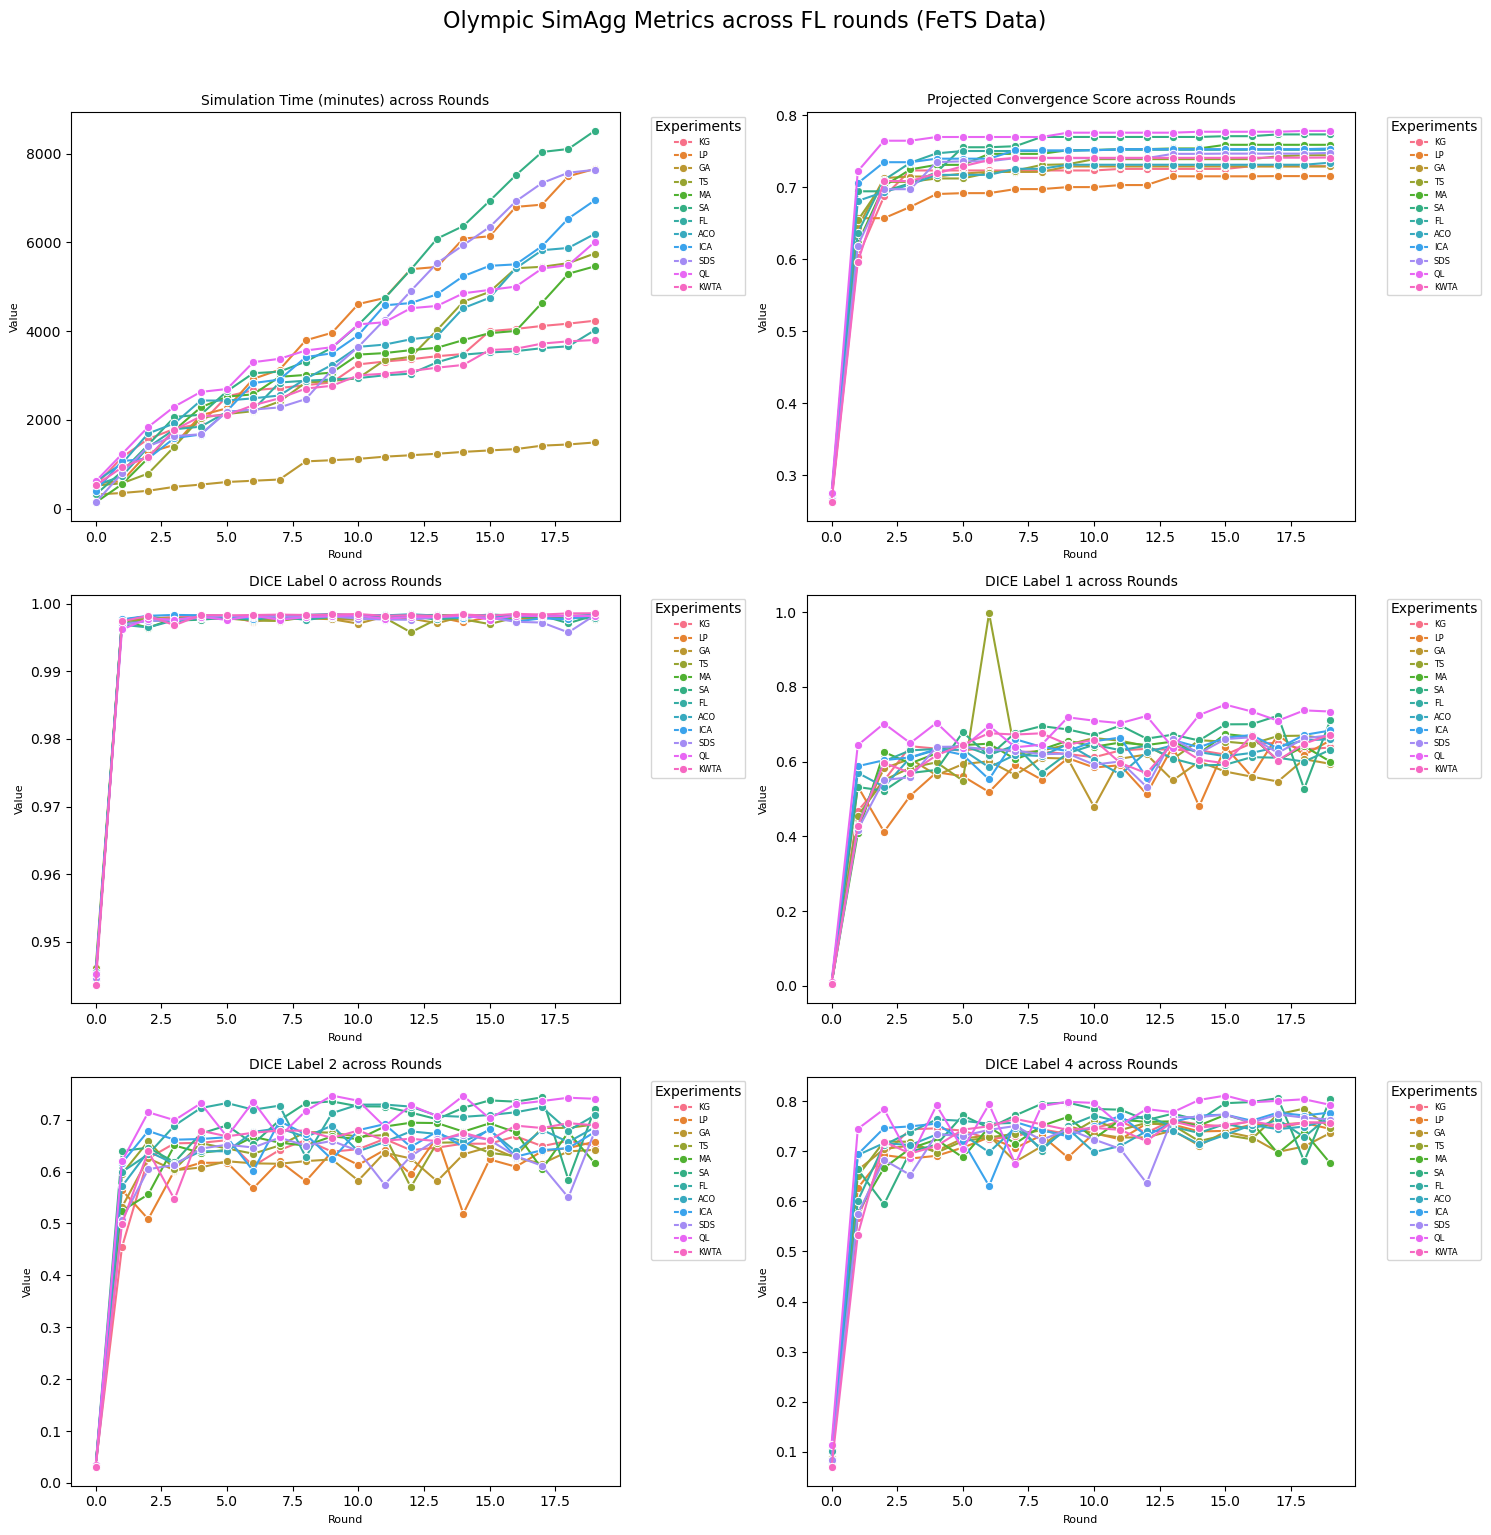

In [62]:
# Set the color palette 
palette = sns.color_palette("husl", n_colors=filtered_data['Experiment'].nunique()) 
 
# Number of plots and layout setup 
num_metrics = len(selected_metrics) 
num_rows = (num_metrics + 1) // 2  # Calculate number of rows needed for two columns 
 
# Create line graphs in a two-column layout 
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows)) 
axes = axes.flatten()  # Flatten the array of axes for easier indexing 
 
for i, metric in enumerate(selected_metrics): 
    ax = axes[i] 
    sns.lineplot(data=filtered_data[filtered_data['Metrics'] == metric], x='Rounds', y='Value', hue='Experiment', palette=palette, ax=ax, marker='o') 
    ax.set_title(f"{metric} across Rounds", fontsize=10) 
    ax.set_xlabel('Round', fontsize=8) 
    ax.set_ylabel('Value', fontsize=8) 
    ax.legend(title='Experiments', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6) 
 
# Hide the last subplot if the number of metrics is odd 
if num_metrics % 2 != 0: 
    axes[-1].axis('off') 
 
# Add the main title 
fig.suptitle('Olympic SimAgg Metrics across FL rounds (FeTS Data)', fontsize=16, y=1.02) 
 
plt.tight_layout() 
plt.show() 
 

In [22]:
fig.savefig('Quantum Inspired SimAgg Metrics across FL rounds FeTS Data.png')

In [64]:
fig.savefig('Olympic SimAgg Metrics across FL rounds FeTS Data.png')